In [1]:
iden = matrix.identity(2)
iden4 = matrix.identity(4)

# Eigenvectors for Z, X and Y in that order
z, o = Matrix([1,0]).transpose(), Matrix([0,1]).transpose()
pk, mk = 1/sqrt(2)*Matrix([1,1]).transpose(), 1/sqrt(2)*Matrix([1,-1]).transpose()
ip, im = 1/sqrt(2)*Matrix([1,i]).transpose(), 1/sqrt(2)*Matrix([1,-i]).transpose()

# Writing Z, X, Y using their spectral decomposition
Z = z*z.conjugate_transpose() - o*o.conjugate_transpose()
X = pk*pk.conjugate_transpose() - mk*mk.conjugate_transpose()
Y = ip*ip.conjugate_transpose() - im*im.conjugate_transpose()

e_phi_ideal = [Matrix([0,1]).transpose(), Matrix([sqrt(3)/2, 1/2]).transpose(), Matrix([sqrt(3)/2, -1/2]).transpose()]

# Eigenvalues of Alice and Bob's density using the Bell basis
l_pp = var('l_pp', domain='real', latex_name='\\lambda_{\\phi^+}')
l_pm = var('l_pm', domain='real', latex_name='\\lambda_{\\phi^-}')
l_sp = var('l_sp', domain='real', latex_name='\\lambda_{\\psi^+}')
l_sm = var('l_sm', domain='real', latex_name='\\lambda_{\\psi^-}')

proj = lambda vec: vec*vec.conjugate_transpose()

# Define variables and measurement projections
theta1, theta2, gamma1, gamma2 = var('theta1 theta2 gamma1 gamma2', domain='real')
eps=var('epsilon', domain='real')
delta1, delta2 = var('delta1 delta2', domain = 'real')

phi1 = Matrix([cos(theta1), e^(i*gamma1)*sin(theta1)]).transpose()
phi2 = Matrix([cos(theta2), e^(i*gamma2)*sin(theta2)]).transpose()
pphi0 = proj(z)
pphi1 = proj(phi1)
pphi2 = proj(phi2)

# The measurement
E = [[pphi0, iden - pphi0], [pphi1, iden - pphi1], [pphi2, iden - pphi2]]

pphi1_ideal = pphi1.subs(theta1=pi/3, gamma1=0)
pphi2_ideal = pphi2.subs(theta2=-pi/3, gamma2=0)
E_ideal = [[pphi0, iden - pphi0],[pphi1_ideal, iden - pphi1_ideal],[pphi2_ideal, iden - pphi2_ideal]]

# Born rule
p = lambda y_A, y_B, x_A, x_B, M, rho : l_pp/2*(M[x_A][y_A]*M[x_B][y_B]).trace() + \
                                l_pm/2*(M[x_A][y_A]*Z*M[x_B][y_B]*Z).trace() + \
                                l_sp/2*(M[x_A][y_A]*X*M[x_B][y_B]*X).trace() + \
                                l_sm/2*(M[x_A][y_A]*Y*M[x_B][y_B]*Y).trace()
# Assuming l_sp=l_sm=0
p_eve = lambda y_A, y_B, x_A, x_B, M : p(y_A, y_B, x_A, x_B, M).subs(l_sp=0, l_sm=0)

# Compute J3 given a specific probability distribution and measurement
J3 = lambda pr, M, rho: 1 - 1/4*(sum(pr(y_A, y_B, x_A, x_B, M, rho) for y_A in range(2) for y_B in range(2)  \
                   for x_A in range(3) for x_B in range(3) \
                   if y_A != y_B if x_A != x_B))

# Compute S given a specific probability distribution and measurement
S = lambda pr, M, rho: 1/3*sum(pr(y_A, y_B, x, x, M, rho) for y_A in range(2) for y_B in range(2) \
                      for x in range(3) if y_A != y_B)

In [2]:
epr = 1/2*Matrix([[1,0,0,1],[0,0,0,0],[0,0,0,0],[1,0,0,1]])
nu = var('nu', domain='real')
werner = (1-nu)*epr + nu*1/4*iden4

p_given_rho = lambda y_A, y_B, x_A, x_B, M, rho: ((M[x_A][y_A].tensor_product(M[x_B][y_B]))*rho).trace()

show(J3(p_given_rho, E_ideal, werner))
show(S(p_given_rho, E_ideal, werner))
show(J3(p_given_rho, E_ideal, epr))
show(S(p_given_rho, E_ideal, epr))

3/8*nu - 1/8

1/2*nu

-1/8

0

In [3]:
var("x t gamma")
h(x) = - x*log(x,2) - (1-x)*log(1-x,2)
g(x) = 1 - h(3-4*x/gamma)
dg = g.derivative()
show (dg)
f0 = g # x < t
f1 = dg(t)[0]*x + g(t) - dg(t)[0]*t # x > t

x |--> (4*log(4*x/gamma - 2)/(gamma*log(2)) - 4*log(-4*x/gamma + 3)/(gamma*log(2)))

In [6]:
# Key rate curves
n = var('n')
eps_ec = var('eps_ec', latex_name="\\epsilon_{EC}")
eps_s_qkd = var('eps_s_qkd', latex_name="\\epsilon^s_{QKD}")
eps_c_qkd = var('eps_c_qkd', latex_name="\\epsilon^c_{QKD}")
delta_est = var('delta_est')
J_3 = var('J_3')
Q = var('Q')
eta_opt = var('eta_opt')

h = lambda val: -val*log(val, 2) - (1-val)*log(1-val,2) if val != 0 else 0
J_3 = 3/4*Q - 1/8
r_i = gamma*(2/3-2/3*J_3)

#eps_c_ec = eps'_ec + eps_ec

leak_ec = n*((1-gamma)*h(Q)+gamma*h(2/3-2/3*J_3)) + sqrt(n)*4*log(2*sqrt(2)+1,2)*sqrt(2*log(8/(eps_c_qkd - eps_ec)^2,2))\
            + log(8/(eps_c_qkd - eps_ec)^2 + 2/(2-(eps_c_qkd - eps_ec)),2) + log(1/eps_ec,2)
show("leak_ec: ", leak_ec)

l = n*eta_opt - leak_ec - 3*log(1-sqrt(1-(eps_s_qkd/4)^2), 2) \
                   - gamma*n - sqrt(n)*2*log(7, 2)*sqrt(1-2*log(eps_s_qkd/4*(eps_ec + eps_s_qkd),2)) - 2*log(1/eps_s_qkd,2)

show("l: ", l)

'leak_ec: ' 1/4*(4*(gamma - 1)*(Q*log(Q)/log(2) - (Q - 1)*log(-Q + 1)/log(2)) - gamma*((2*Q + 1)*log(1/2*Q + 1/4)/log(2) - (2*Q - 3)*log(-1/2*Q + 3/4)/log(2)))*n + 4*sqrt(2)*sqrt(n)*sqrt(log(8/(eps_c_qkd - eps_ec)^2)/log(2))*log(2*sqrt(2) + 1)/log(2) + log(-2/(eps_c_qkd - eps_ec - 2) + 8/(eps_c_qkd - eps_ec)^2)/log(2) + log(1/eps_ec)/log(2)

'l: ' -1/4*(4*(gamma - 1)*(Q*log(Q)/log(2) - (Q - 1)*log(-Q + 1)/log(2)) - gamma*((2*Q + 1)*log(1/2*Q + 1/4)/log(2) - (2*Q - 3)*log(-1/2*Q + 3/4)/log(2)))*n + eta_opt*n - gamma*n - 4*sqrt(2)*sqrt(n)*sqrt(log(8/(eps_c_qkd - eps_ec)^2)/log(2))*log(2*sqrt(2) + 1)/log(2) - 2*sqrt(n)*sqrt(-2*log(1/4*(eps_ec + eps_s_qkd)*eps_s_qkd)/log(2) + 1)*log(7)/log(2) - 3*log(-sqrt(-1/16*eps_s_qkd^2 + 1) + 1)/log(2) - log(-2/(eps_c_qkd - eps_ec - 2) + 8/(eps_c_qkd - eps_ec)^2)/log(2) - log(1/eps_ec)/log(2) - 2*log(1/eps_s_qkd)/log(2)

In [7]:
p0, p1, p2 = var('p0 p1 p2', domain="real")

verbose 0 (2211: graphics.py, get_minmax_data) ymin was NaN (setting to 0)
verbose 0 (2211: graphics.py, get_minmax_data) ymax was NaN (setting to 0)


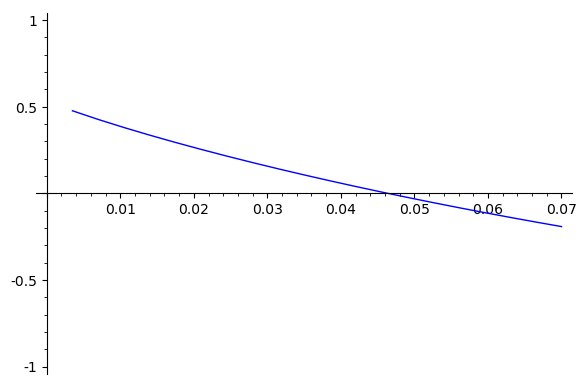

In [18]:

eta = lambda x_0, eps_s, eps_2, n: f1(x=x_0) - 1/sqrt(n)*2*(log(9,2) + dg(x=t)[0])*sqrt(1 - 2*log(eps_s*eps_2,2))
L2 = []
gamma0=2*(p0*p1 + p0*p2 + p1*p2).subs(p0=0.97, p1=0.015, p2=0.015)
n0=10^15
for k in range(0, 21):
    Q_val = k*0.07/20
    x_0 = (gamma*(2/3 - 2/3*J_3) - 10^-3).subs(Q=Q_val)
    eta_val = (eta(x_0, eps_s_qkd/4, eps_ec + eps_s_qkd, n)).subs(n=n0) \
                                                        .subs(eps_ec=10^-10) \
                                                        .subs(eps_c_qkd=10^-2) \
                                                        .subs(eps_s_qkd=10^-5) \
                                                        .subs(gamma=gamma0)
    
    t_0 = solve(eta_val.derivative(t)==0,t)[0].rhs()
    l_n_val = (l/n).subs(gamma = gamma0) \
                        .subs(Q = Q_val) \
                        .subs(n=n0) \
                        .subs(eps_c_qkd=10^-2) \
                        .subs(eps_s_qkd=10^-5) \
                        .subs(eps_ec=10^-10) \
                        .subs(eta_opt = eta_val.subs(t=t_0))
    
    L2.append((Q_val, N(l_n_val)))
    
plot_q = list_plot(L2, plotjoined=True)
show(plot_q)

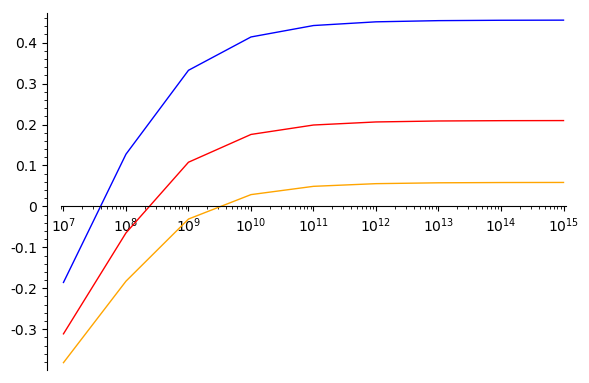

In [46]:
L3, L4, L5 = [], [], []
vals = [10^i for i in range(7, 16)]
Q_val = 0.005
gamma0=2*(p0*p1 + p0*p2 + p1*p2).subs(p0=0.97, p1=0.015, p2=0.015)
for n0 in vals:
    x_0 = (gamma*(2/3 - 2/3*J_3) - 10^-3).subs(Q=Q_val)
    eta_val = (eta(x_0, eps_s_qkd/4, eps_ec + eps_s_qkd, n)).subs(n=n0) \
                                                        .subs(eps_ec=10^-10) \
                                                        .subs(eps_c_qkd=10^-2) \
                                                        .subs(eps_s_qkd=10^-5) \
                                                        .subs(gamma=gamma0)
    
    t_0 = solve(eta_val.derivative(t)==0,t)[0].rhs()
    l_n_val = (l/n).subs(gamma = gamma0) \
                        .subs(Q = Q_val) \
                        .subs(n=n0) \
                        .subs(eps_c_qkd=10^-2) \
                        .subs(eps_s_qkd=10^-5) \
                        .subs(eps_ec=10^-10) \
                        .subs(eta_opt = eta_val.subs(t=t_0))
    
    L3.append((n0, N(l_n_val)))
    
Q_val = 0.025
for n0 in vals:
    x_0 = (gamma*(2/3 - 2/3*J_3) - 10^-3).subs(Q=Q_val)
    eta_val = (eta(x_0, eps_s_qkd/4, eps_ec + eps_s_qkd, n)).subs(n=n0) \
                                                        .subs(eps_ec=10^-10) \
                                                        .subs(eps_c_qkd=10^-2) \
                                                        .subs(eps_s_qkd=10^-5) \
                                                        .subs(gamma=gamma0)
    
    t_0 = solve(eta_val.derivative(t)==0,t)[0].rhs()
    l_n_val = (l/n).subs(gamma = gamma0) \
                        .subs(Q = Q_val) \
                        .subs(n=n0) \
                        .subs(eps_c_qkd=10^-2) \
                        .subs(eps_s_qkd=10^-5) \
                        .subs(eps_ec=10^-10) \
                        .subs(eta_opt = eta_val.subs(t=t_0))
    
    L4.append((n0, N(l_n_val)))
    
Q_val = 0.04
for n0 in vals:
    x_0 = (gamma*(2/3 - 2/3*J_3) - 10^-3).subs(Q=Q_val)
    eta_val = (eta(x_0, eps_s_qkd/4, eps_ec + eps_s_qkd, n)).subs(n=n0) \
                                                        .subs(eps_ec=10^-10) \
                                                        .subs(eps_c_qkd=10^-2) \
                                                        .subs(eps_s_qkd=10^-5) \
                                                        .subs(gamma=gamma0)
    
    t_0 = solve(eta_val.derivative(t)==0,t)[0].rhs()
    l_n_val = (l/n).subs(gamma = gamma0) \
                        .subs(Q = Q_val) \
                        .subs(n=n0) \
                        .subs(eps_c_qkd=10^-2) \
                        .subs(eps_s_qkd=10^-5) \
                        .subs(eps_ec=10^-10) \
                        .subs(eta_opt = eta_val.subs(t=t_0))
    
    L5.append((n0, N(l_n_val)))

plot_1 = list_plot(L3, plotjoined=True, scale=('semilogx', 10))
plot_1 += list_plot(L4, plotjoined=True, color='red', scale=('semilogx', 10))
plot_1 += list_plot(L5, plotjoined=True, color='orange', scale=('semilogx', 10))

plot_1.show()

#show(L3)

In [1]:
alpha = var('alpha')
p_alpha = [1/2-alpha/2, 1/2-alpha/2, alpha]
p_a_x = lambda x_A, x_B : p_alpha[x_A]*p_alpha[x_B]
gamma_alpha = sum(p_a_x(x_A, x_B) for x_A in range(3) 
                                  for x_B in range(3) if x_A != x_B)

In [2]:
show(gamma_alpha.expand())

-3/2*alpha^2 + alpha + 1/2

In [21]:
2/3 - 2/3*(-1/8)
N(3/4 - 10^-3)

0.749000000000000

In [6]:
g2(x) = 1 - h(x/2)
show(g2.derivative())
show(g2.derivative().subs(x=0))

x |--> 1/2*log(1/2*x)/log(2) - 1/2*log(-1/2*x + 1)/log(2)

x |--> -Infinity

In [12]:
var("x t gamma kappa")
h(x) = - x*log(x,2) - (1-x)*log(1-x,2)
g2(x) = 1 - h(x/(2*kappa*(1-gamma)))
dg2 = g2.derivative()
show (dg2)
k0 = g2 # x >= t
k1 = -dg2(t)[0]*x + g2(t) + dg2(t)[0]*t # x < t 
show(k1.subs(x=t).simplify_full())

x |--> (1/2*log(1/2*x/((gamma - 1)*kappa) + 1)/((gamma - 1)*kappa*log(2)) - 1/2*log(-1/2*x/((gamma - 1)*kappa))/((gamma - 1)*kappa*log(2)))

1/2*(2*(gamma*log(2) - log(2))*kappa + (2*(gamma - 1)*kappa + t)*log(1/2*(2*(gamma - 1)*kappa + t)/((gamma - 1)*kappa)) - t*log(-1/2*t/((gamma - 1)*kappa)))/((gamma*log(2) - log(2))*kappa)

In [ ]:
# Key rate curves
n = var('n')
eps_ec = var('eps_ec', latex_name="\\epsilon_{EC}")
eps_s_qkd = var('eps_s_qkd', latex_name="\\epsilon^s_{QKD}")
eps_c_qkd = var('eps_c_qkd', latex_name="\\epsilon^c_{QKD}")
delta_est = var('delta_est')
J_3 = var('J_3')
Q = var('Q')
eta_opt = var('eta_opt')

h = lambda val: -val*log(val, 2) - (1-val)*log(1-val,2) if val != 0 else 0
J_3 = 3/4*Q - 1/8
r_i = gamma*(2/3-2/3*J_3)

#eps_c_ec = eps'_ec + eps_ec

leak_ec = n*((1-gamma)*h(Q)+gamma*h(2/3-2/3*J_3)) + sqrt(n)*4*log(2*sqrt(2)+1,2)*sqrt(2*log(8/(eps_c_qkd - eps_ec)^2,2))\
            + log(8/(eps_c_qkd - eps_ec)^2 + 2/(2-(eps_c_qkd - eps_ec)),2) + log(1/eps_ec,2)
show("leak_ec: ", leak_ec)

l = n*eta_opt - leak_ec - 3*log(1-sqrt(1-(eps_s_qkd/4)^2), 2) \
                   - gamma*n - sqrt(n)*2*log(7, 2)*sqrt(1-2*log(eps_s_qkd/4*(eps_ec + eps_s_qkd),2)) - 2*log(1/eps_s_qkd,2)

show("l: ", l)